Função para abrir o arquivo e imprimir os pontos

In [21]:
# Abre o arquivo em modo de leitura
nome_arquivo = "xqf131.tsp"
try:
    with open(nome_arquivo, 'r') as arquivo:
        # Lê e imprime o conteúdo do arquivo
        conteudo = arquivo.read()
        print(conteudo)
except FileNotFoundError:
    print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro: {str(e)}")


NAME : xqf131
COMMENT : Bonn VLSI data set with 131 points
COMMENT : Uni Bonn, Research Institute for Discrete Math
COMMENT : Contributed by Andre Rohe
TYPE : TSP
DIMENSION : 131
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 0 13
2 0 26
3 0 27
4 0 39
5 2 0
6 5 13
7 5 19
8 5 25
9 5 31
10 5 37
11 5 43
12 5 8
13 8 0
14 9 10
15 10 10
16 11 10
17 12 10
18 12 5
19 15 13
20 15 19
21 15 25
22 15 31
23 15 37
24 15 43
25 15 8
26 18 11
27 18 13
28 18 15
29 18 17
30 18 19
31 18 21
32 18 23
33 18 25
34 18 27
35 18 29
36 18 31
37 18 33
38 18 35
39 18 37
40 18 39
41 18 41
42 18 42
43 18 44
44 18 45
45 25 11
46 25 15
47 25 22
48 25 23
49 25 24
50 25 26
51 25 28
52 25 29
53 25 9
54 28 16
55 28 20
56 28 28
57 28 30
58 28 34
59 28 40
60 28 43
61 28 47
62 32 26
63 32 31
64 33 15
65 33 26
66 33 29
67 33 31
68 34 15
69 34 26
70 34 29
71 34 31
72 34 38
73 34 41
74 34 5
75 35 17
76 35 31
77 38 16
78 38 20
79 38 30
80 38 34
81 40 22
82 41 23
83 41 32
84 41 34
85 41 35
86 41 36
87 48 22
88 48 27
89 48 6
90 51 

--- INICIALIZANDO O CÓDIGO ---

Função para ler o arquivo e salvar as coordenadas. Retorna o parâmetro "cidades"

In [22]:
import random

#Ler o arquivo
def ler_arquivo_tsp(nome_arquivo):
    cidades = []
    with open(nome_arquivo, 'r') as arquivo:
        lendo_coord = False
        for linha in arquivo:
            linha = linha.strip()
            if linha.startswith("NODE_COORD_SECTION"):
                lendo_coord = True
            elif linha.startswith("EOF"):
                break
            elif lendo_coord:
                partes = linha.split()
                cidade_id = int(partes[0])
                x = float(partes[1])
                y = float(partes[2])
                cidades.append((cidade_id, x, y))
    return cidades

Função para plotar um gráfico com os pontos que foram salvos anteriormente

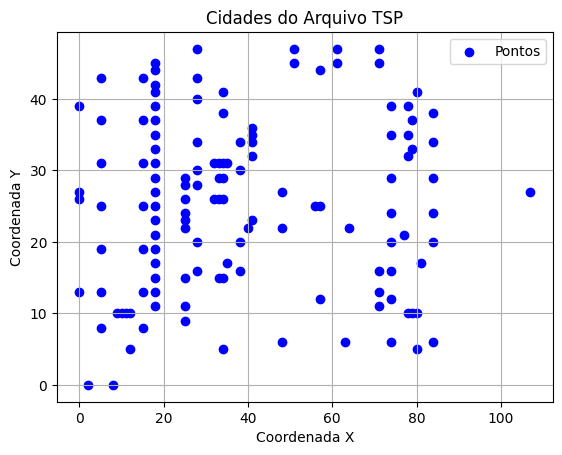

In [23]:
import matplotlib.pyplot as plt

# Plotar pontos
def plotar_pontos(cidades):
    cidade_ids, x, y = zip(*cidades)
    plt.scatter(x, y, marker='o', color='b', label='Pontos')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Cidades do Arquivo TSP')
    plt.legend()
    plt.grid(True)
    plt.show()

# Nome do arquivo TSP
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas dos pontos
cidades = ler_arquivo_tsp(nome_arquivo)

# Plotar os pontos em um gráfico
plotar_pontos(cidades)


Função para criar a população inicial de cromossomos, formada a partir de indivíduos aleatoriamente criados. Utiliza as coordenadas das cidades criadas anteriormente. Essa função foi utilizada pois a inicialização da população determina o processo de criação dos indivíduos para o primeiro ciclo do algoritmo. Dessa forma, foi escolhido o valor 100 para criar 100 diferentes rotas para atender os 131 pontos.

In [24]:
#Criar populaçao inicial
def criar_populacao_inicial(cidades, tamanho_populacao):
    # Crie indivíduos como permutações aleatórias das cidades
    populacao = []
    cidades_sem_origem = cidades[1:]  # Exclua a cidade de origem
    for _ in range(tamanho_populacao):
        cromossomo = random.sample(cidades_sem_origem, len(cidades_sem_origem))
        cromossomo.insert(0, cidades[0])  # Adicione a cidade de origem no início
        populacao.append(cromossomo)
    return populacao

# Substitua "exemplo.tsp" pelo nome do seu arquivo .tsp
nome_do_arquivo_tsp = "xqf131.tsp"

# Leitura das coordenadas das cidades do arquivo .tsp
cidades = ler_arquivo_tsp(nome_do_arquivo_tsp)

# Inicialização da população
tamanho_populacao = 100  # Tamanho da população inicial
populacao_inicial = criar_populacao_inicial(cidades, tamanho_populacao)
#print (populacao_inicial)

# Agora, a variável "populacao_inicial" contém a população inicial de cromossomos


---CÁLCULO DA FITNESS---

Função para calcular a distância euclidiana entre duas cidades

In [25]:
import random
import math
#Calculo da distancia
def calcular_distancia(cidade1, cidade2):
    # Cálculo da distância euclidiana entre duas cidades
    x1, y1 = cidade1[1], cidade1[2]
    x2, y2 = cidade2[1], cidade2[2]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

Função para calcular a aptidão do indivíduo (nesse caso, cada cidade é um cromossomo, e a aptidão é dada pela soma das distâncias entre duas cidades). Essa função foi utilizada para avaliar quão boa é uma solução candidata (cromossomo) em relação ao problema. Ou seja, a função de aptidão avalia o desempenho de um cromossomo. 

In [26]:
#Calcular aptidao
def calcular_aptidao(cromossomo):
    # Calcula a distância total percorrida no TSP
    distancia_total = 0.0
    for i in range(len(cromossomo) - 1):
        cidade_atual = cromossomo[i]
        proxima_cidade = cromossomo[i + 1]
        distancia_total += calcular_distancia(cidade_atual, proxima_cidade)
    
    # Adicione a distância de retorno à cidade de origem
    distancia_total += calcular_distancia(cromossomo[-1], cromossomo[0])
    
    # Retornamos a distância total
    return distancia_total

# Substitua "exemplo.tsp" pelo nome do seu arquivo .tsp
nome_do_arquivo_tsp = "xqf131.tsp"

# Leitura das coordenadas das cidades do arquivo .tsp
cidades = ler_arquivo_tsp(nome_do_arquivo_tsp)

# Cálculo da aptidão para o cromossomo de exemplo
for cromossomo_exemplo in populacao_inicial:
    aptidao_exemplo = calcular_aptidao(cromossomo_exemplo)
    #print("{:.2f}".format(aptidao_exemplo))

# Agora, a variável "aptidao_exemplo" contém a aptidão do cromossomo de exemplo


---SELEÇÃO---

Função para realizar a seleção utilizando o método do torneio, retornando o vencedor (no caso, o cromossomo com melhor aptidão). Essa função foi usada para selecionar indivíduos da população atual que serão os pais das próximas gerações. A função retorna o vencedor de cada torneio (pais da próxima geração)

In [27]:
import random
import math
import matplotlib.pyplot as plt

# Função para realizar o torneio de seleção
def selecao_torneio(populacao, tamanho_torneio):
    torneio = random.sample(populacao, tamanho_torneio)
    vencedor_torneio = min(torneio, key=calcular_aptidao)
    return vencedor_torneio

Função para realizar o crossover ordenado entre dois pais.  Essa função foi usada para realizar o processo de cruzamento (crossover) entre dois pais a fim de criar um filho, ou seja, para ir melhorando a aptidão dos cromossomos e ir gerando melhores filhos (com melhor aptidão) com o passar das gerações. A função retorna o filho que herdou as melhores características dos seus pais.

In [28]:
# Função para realizar o crossover ordenado entre dois pais
def crossover_ordenado(pai1, pai2):
    ponto_corte1, ponto_corte2 = sorted(random.sample(range(len(pai1)), 2))
    filho = [-1] * len(pai1)
    filho[ponto_corte1:ponto_corte2 + 1] = pai1[ponto_corte1:ponto_corte2 + 1]
    restantes_genes = [gene for gene in pai2 if gene not in filho]
    indice_insercao = 0
    for i in range(len(filho)):
        if filho[i] == -1:
            filho[i] = restantes_genes[indice_insercao]
            indice_insercao += 1
    return filho

Função para realizar a mutação de um cromossomo. Essa função foi usada para atuar sobre os cromossomos gerados pelo crossover, permitindo que valores de genes, eventualmente perdidos durante o processo de evolução, possam retornar à população, possibilitando a avaliação dos mesmos em novos contextos populacionais. Por outro lado, tem-se que este operador também proporciona o surgimento de novos genes, não presentes nas populações iniciais, contribuindo para a diversidade da população. O operador de mutação introduz um certo grau de aleatoriedade no algoritmo genético, permitindo que mais pontos do espaço de busca sejam efetivamente avaliados.

In [29]:
# Função para realizar a mutação de um cromossomo
def mutacao(cromossomo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        indice1, indice2 = random.sample(range(len(cromossomo)), 2)
        cromossomo[indice1], cromossomo[indice2] = cromossomo[indice2], cromossomo[indice1]

Função para criar a próxima geração com elitismo. Essa função foi usada como técnica de substituição de indivíduos para evitar que a melhor solução encontrada até o momento não seja perdida ao longo de várias gerações até que um critério de parada seja atingido. Ou seja, o parâmetro para gerações não foi definido pois não foi possível prever com antecedência a quantidade de gerações necessárias para encontrar uma solução factível, portanto, foi criado um loop com o critério de parada usando o fator de número máximo de gerações sem melhoria para que o algoritmo continue evoluindo até que o critério de parada seja atingido. Para o critério de parada "max_iter_sem_melhoria=80", foi utilizado o parâmetro "iter_sem_melhoria", de forma que o algoritmo pare se em 80 gerações consecutivas não resultar em uma melhoria de solução, evitando que o algoritmo continue indefinidamente sem fazer progresso. O parâmetro "tamanho_populacao=400" indica que há 400 indivíduos (rotas) diferentes para compor a geração. O parâmetro "tamanho_torneio=40" indica a quantidade de indivíduos que competem na seleção, favorecendo os que tem maior aptidão. E o parâmetro "taxa_mutacao=0.04" indica que para cada gene em um cromossomo há uma probabilidade de 4% de que ocorra uma mutação. O parâmetro "num_rodadas=3" indica a quantidade de rodadas do algoritmo genético, com objetivo de analisarmos e encontrarmos a melhor solução viável e ótimo. Ao final, printa a melhor rota encontrada para cada rodada, plotar o gráfico para cada rodada e por fim demonstrar a evolução presente ao decorrer do desenvolvimento do algoritmo. 

Rodada: 1, Geração: 1, Melhor custo atual: 3775.92
Rodada: 1, Geração: 2, Melhor custo atual: 3597.49
Rodada: 1, Geração: 3, Melhor custo atual: 3365.83
Rodada: 1, Geração: 4, Melhor custo atual: 3274.76
Rodada: 1, Geração: 5, Melhor custo atual: 3223.80
Rodada: 1, Geração: 6, Melhor custo atual: 3088.77
Rodada: 1, Geração: 7, Melhor custo atual: 3003.78
Rodada: 1, Geração: 8, Melhor custo atual: 2906.10
Rodada: 1, Geração: 9, Melhor custo atual: 2804.75
Rodada: 1, Geração: 10, Melhor custo atual: 2744.50
Rodada: 1, Geração: 11, Melhor custo atual: 2708.58
Rodada: 1, Geração: 12, Melhor custo atual: 2665.85
Rodada: 1, Geração: 13, Melhor custo atual: 2620.70
Rodada: 1, Geração: 14, Melhor custo atual: 2557.62
Rodada: 1, Geração: 15, Melhor custo atual: 2534.11
Rodada: 1, Geração: 16, Melhor custo atual: 2497.59
Rodada: 1, Geração: 17, Melhor custo atual: 2472.86
Rodada: 1, Geração: 18, Melhor custo atual: 2424.51
Rodada: 1, Geração: 19, Melhor custo atual: 2401.18
Rodada: 1, Geração: 2

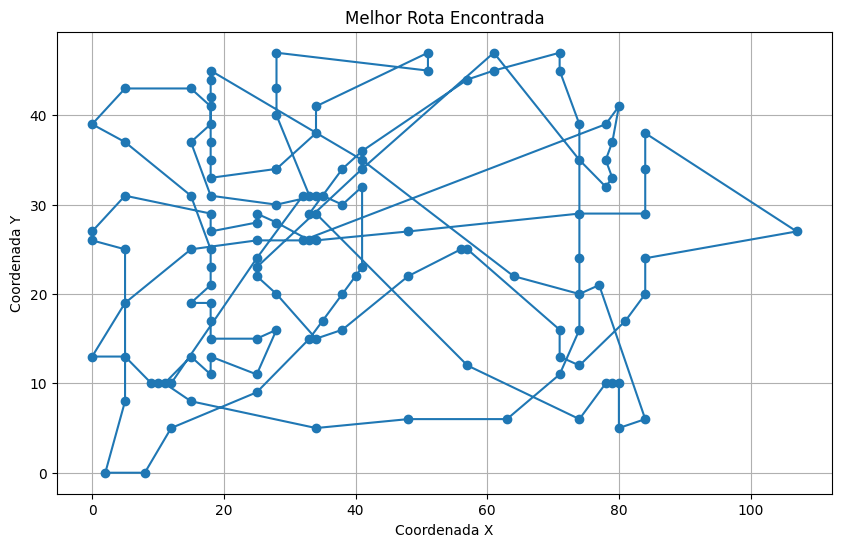

Rodada: 2, Geração: 1, Melhor custo atual: 3772.23
Rodada: 2, Geração: 2, Melhor custo atual: 3690.38
Rodada: 2, Geração: 3, Melhor custo atual: 3570.60
Rodada: 2, Geração: 4, Melhor custo atual: 3412.52
Rodada: 2, Geração: 5, Melhor custo atual: 3341.55
Rodada: 2, Geração: 6, Melhor custo atual: 3266.02
Rodada: 2, Geração: 7, Melhor custo atual: 3164.54
Rodada: 2, Geração: 8, Melhor custo atual: 3057.47
Rodada: 2, Geração: 9, Melhor custo atual: 2995.49
Rodada: 2, Geração: 10, Melhor custo atual: 2939.85
Rodada: 2, Geração: 11, Melhor custo atual: 2825.90
Rodada: 2, Geração: 12, Melhor custo atual: 2767.97
Rodada: 2, Geração: 13, Melhor custo atual: 2725.09
Rodada: 2, Geração: 14, Melhor custo atual: 2679.99
Rodada: 2, Geração: 15, Melhor custo atual: 2635.30
Rodada: 2, Geração: 16, Melhor custo atual: 2589.56
Rodada: 2, Geração: 17, Melhor custo atual: 2537.61
Rodada: 2, Geração: 18, Melhor custo atual: 2515.75
Rodada: 2, Geração: 19, Melhor custo atual: 2479.34
Rodada: 2, Geração: 2

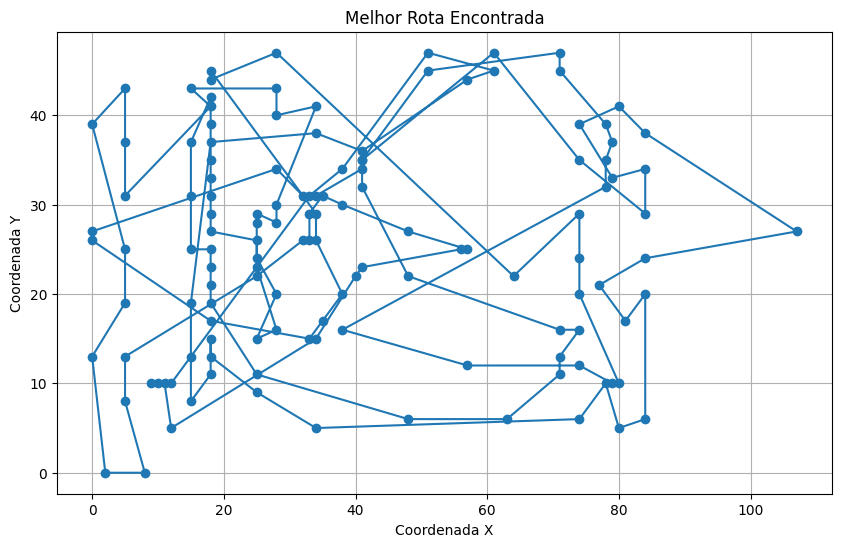

Rodada: 3, Geração: 1, Melhor custo atual: 3710.06
Rodada: 3, Geração: 2, Melhor custo atual: 3607.68
Rodada: 3, Geração: 3, Melhor custo atual: 3477.39
Rodada: 3, Geração: 4, Melhor custo atual: 3282.56
Rodada: 3, Geração: 5, Melhor custo atual: 3143.03
Rodada: 3, Geração: 6, Melhor custo atual: 2992.30
Rodada: 3, Geração: 7, Melhor custo atual: 2856.26
Rodada: 3, Geração: 8, Melhor custo atual: 2772.14
Rodada: 3, Geração: 9, Melhor custo atual: 2715.04
Rodada: 3, Geração: 10, Melhor custo atual: 2679.65
Rodada: 3, Geração: 11, Melhor custo atual: 2650.51
Rodada: 3, Geração: 12, Melhor custo atual: 2606.17
Rodada: 3, Geração: 13, Melhor custo atual: 2567.13
Rodada: 3, Geração: 14, Melhor custo atual: 2536.22
Rodada: 3, Geração: 15, Melhor custo atual: 2499.01
Rodada: 3, Geração: 16, Melhor custo atual: 2485.61
Rodada: 3, Geração: 17, Melhor custo atual: 2467.89
Rodada: 3, Geração: 18, Melhor custo atual: 2452.93
Rodada: 3, Geração: 19, Melhor custo atual: 2427.14
Rodada: 3, Geração: 2

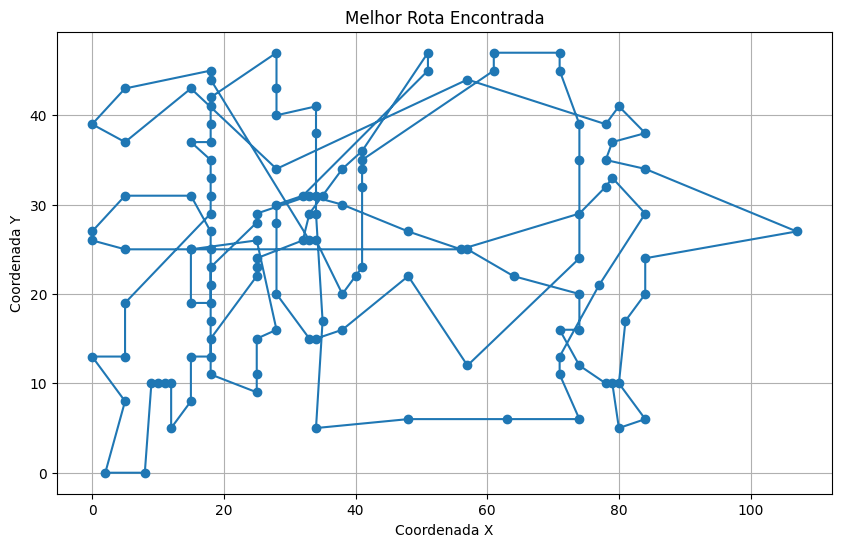

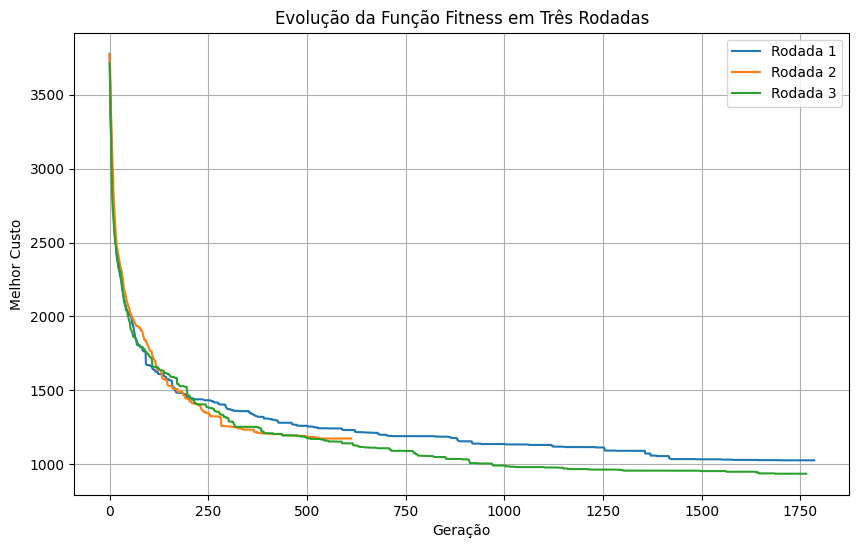

In [30]:
import matplotlib.pyplot as plt

# Função para criar a próxima geração com elitismo
def criar_proxima_geracao(populacao, tamanho_torneio, taxa_mutacao):
    proxima_geracao = []
    melhor_cromossomo = min(populacao, key=calcular_aptidao)
    proxima_geracao.append(melhor_cromossomo)  # Elitismo: mantém o melhor cromossomo
    while len(proxima_geracao) < len(populacao):
        pai1 = selecao_torneio(populacao, tamanho_torneio)
        pai2 = selecao_torneio(populacao, tamanho_torneio)
        filho = crossover_ordenado(pai1, pai2)
        mutacao(filho, taxa_mutacao)
        proxima_geracao.append(filho)
    return proxima_geracao

# Função para encontrar e imprimir a melhor rota em uma rodada
def encontrar_melhor_rota(populacao, cidades):
    melhor_cromossomo = min(populacao, key=calcular_aptidao)
    melhor_aptidao = calcular_aptidao(melhor_cromossomo)
    print("Melhor Rota Encontrada:")
    print("Rota:", melhor_cromossomo)
    print("Aptidão:", melhor_aptidao)

    # Plotar a melhor rota encontrada
    melhor_rota_x, melhor_rota_y = zip(*[(cidade[1], cidade[2]) for cidade in melhor_cromossomo])
    melhor_rota_x = list(melhor_rota_x) + [melhor_rota_x[0]]
    melhor_rota_y = list(melhor_rota_y) + [melhor_rota_y[0]]

    plt.figure(figsize=(10, 6))
    plt.plot(melhor_rota_x, melhor_rota_y, marker='o', linestyle='-')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Melhor Rota Encontrada')
    plt.grid(True)
    plt.show()

# Substitua "exemplo.tsp" pelo nome do seu arquivo .tsp
nome_do_arquivo_tsp = "xqf131.tsp"

# Leitura das coordenadas das cidades do arquivo .tsp
cidades = ler_arquivo_tsp(nome_do_arquivo_tsp)

# Parâmetros do algoritmo genético
tamanho_populacao = 400
tamanho_torneio = 40
taxa_mutacao = 0.04
num_rodadas = 3  # Número de rodadas do algoritmo genético

# Função para criar a próxima geração com elitismo
def criar_proxima_geracao(populacao, tamanho_torneio, taxa_mutacao):
    proxima_geracao = []
    melhor_cromossomo = min(populacao, key=calcular_aptidao)
    proxima_geracao.append(melhor_cromossomo)  # Elitismo: mantém o melhor cromossomo
    while len(proxima_geracao) < len(populacao):
        pai1 = selecao_torneio(populacao, tamanho_torneio)
        pai2 = selecao_torneio(populacao, tamanho_torneio)
        filho = crossover_ordenado(pai1, pai2)
        mutacao(filho, taxa_mutacao)
        proxima_geracao.append(filho)
    return proxima_geracao

# Execução do algoritmo genético para três rodadas
resultados_rodadas = []
for rodada in range(num_rodadas):
    # Inicialização da população
    populacao = criar_populacao_inicial(cidades, tamanho_populacao)

    # Variáveis para controle de critério de parada automático
    max_iter_sem_melhoria = 80  # Número máximo de gerações sem melhoria
    melhor_custo_atual = float('inf')
    iter_sem_melhoria = 0

    # Evolução do algoritmo genético
    melhores_rotas_rodada = []
    while iter_sem_melhoria < max_iter_sem_melhoria:
        populacao = criar_proxima_geracao(populacao, tamanho_torneio, taxa_mutacao)
        melhor_cromossomo = min(populacao, key=calcular_aptidao)
        melhor_custo = calcular_aptidao(melhor_cromossomo)

        if melhor_custo < melhor_custo_atual:
            melhor_custo_atual = melhor_custo
            iter_sem_melhoria = 0
        else:
            iter_sem_melhoria += 1

        melhores_rotas_rodada.append(melhor_custo_atual)

        print(f"Rodada: {rodada + 1}, Geração: {len(melhores_rotas_rodada)}, Melhor custo atual: {melhor_custo_atual:.2f}")

    resultados_rodadas.append(melhores_rotas_rodada)

    # Encontrar e imprimir a melhor rota para cada rodada
    encontrar_melhor_rota(populacao, cidades)

# Plotar a evolução da função fitness para cada rodada
plt.figure(figsize=(10, 6))
for i, resultados in enumerate(resultados_rodadas):
    plt.plot(resultados, label=f'Rodada {i + 1}')

plt.xlabel('Geração')
plt.ylabel('Melhor Custo')
plt.title('Evolução da Função Fitness em Três Rodadas')
plt.legend()
plt.grid(True)
plt.show()